**EN3150 Assignment 02:** Learning from data and related challenges and classification


210174X

Gallella M.M.H.H.B

ENTC

Assignment on Google Colab: [Notebook Link](https://colab.research.google.com/drive/1P8TsqX1JhBtNELSZgBq-qk6qvn_xQSno?usp=sharing)

# **Logistic regression**

## Data load and preprocessing

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")

# Remove rows with missing values
df.dropna(inplace=True)

# Filter rows for 'Adelie = 0' and 'Chinstrap = 1 ' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'species ' column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded # Adding a new column to the data frame

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded']  # Target variable
X = df_filtered.drop(['species', 'island', 'sex', 'class_encoded'], axis=1)


       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [ ]:
y.head()

,class_encoded
0,0
1,0
2,0
4,0
5,0


In [ ]:
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


## What is the purpose of "y_encoded = le.fit_transform(df_filtered[’species’])" ?


The purpose of `y_encoded = le.fit_transform(df_filtered['species'])` is to encode the categorical target variable `'species'` into numerical labels using `LabelEncoder`. Machine learning models like logistic regression require numerical input for both features and the target variable. This line transforms the species names (`'Adelie'`, `'Chinstrap'`) into integer labels (`0`, `1`), allowing the model to process and learn from the target variable during training.

## What is the purpose of "X = df.drop([’species’, ’island’, ’sex’], axis=1)"


The purpose of `X = df.drop(['species', 'island', 'sex'], axis=1)` is to create the feature matrix `X` by removing the columns `'species'`, `'island'`, and `'sex'` from the DataFrame `df`. By dropping `'species'`, we exclude the target variable from the features. Removing `'island'` and `'sex'` eliminates non-numerical or categorical features that have not been encoded, ensuring that `X` contains only numerical predictor variables suitable for logistic regression.

## Why we cannot use "island" and "sex" features?

We cannot use the `'island'` and `'sex'` features because they are categorical variables represented as strings and have not been converted into numerical format. Logistic regression requires all input features to be numerical. Including these unencoded categorical features would cause errors or lead to inaccurate model training because the algorithm cannot interpret string values. Additionally, using these features without proper encoding could introduce noise or irrelevant patterns, potentially reducing the model's predictive performance.

## Training the logistic regression model.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model. Here we are using 'saga' solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.5813953488372093
[[ 2.75268702e-03 -8.25008150e-05  4.47657437e-04 -2.85719594e-04]] [-8.55637685e-06]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## What is the usage of "random_state=42"?

The `random_state=42` parameter in `train_test_split` is used to ensure reproducibility of the results. By setting a specific integer value (in this case, 42), we fix the sequence of random numbers generated during the data splitting process. This means that every time the code is run, the data will be split into training and testing sets in the same way. This consistency is crucial for debugging, comparing models, and validating results.

## Why is accuracy low? Why does the saga solver perform poorly?

The low accuracy could be due to several factors:

- **Feature Scaling:** The `saga` solver is sensitive to feature scaling. Without standardizing the features, the optimization algorithm may not converge properly, leading to poor performance.
  
- **Data Size and Complexity:** The `saga` solver is designed for large-scale datasets. If the dataset is small or not complex enough, `saga` may not perform optimally.
  
- **Convergence Issues:** Without appropriate hyperparameter tuning or preprocessing, the `saga` solver might struggle to find the global minimum, resulting in a suboptimal model.

Overall, the `saga` solver might perform poorly in this context because it is not the best fit for the dataset's characteristics, especially without feature scaling.

## Now change the solver to "liblinear" by using `logreg = LogisticRegression(solver='liblinear')`. What is the classification accuracy with this configuration?

By changing the solver to `'liblinear'`, the classification accuracy improves. Assuming we run the code with this change, we might observe an increase in accuracy. For example:

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model with 'liblinear' solver
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with 'liblinear' solver:", accuracy)

Accuracy with 'liblinear' solver: 1.0


## Why does the "liblinear" solver perform better than "saga" solver?

The `'liblinear'` solver performs better in this scenario because:

- **Suitability for Small Datasets:** `'liblinear'` is optimized for small to medium-sized datasets, making it a better choice for the penguins dataset, which isn't large.
  
- **Algorithm Efficiency:** `'liblinear'` uses the `Coordinate Descent Algorithm`, which is efficient for datasets with a smaller number of samples and features, not like `SAGA Stochastic Gradient Descent`.
  
- **Less Sensitivity to Feature Scaling:** Unlike `'saga'`, `'liblinear'` is less sensitive to the scale of the features, so it performs adequately even without feature scaling.
  
- **Convergence Reliability:** `'liblinear'` tends to converge more reliably on smaller datasets, providing better performance and higher accuracy.

In contrast, the `'saga'` solver is designed for large-scale problems and is more sensitive to feature scaling and data preprocessing, which may not have been adequately addressed in the initial code.

## Compare the performance of the "liblinear" and "saga" solvers with feature scaling. If there is a significant difference in the accuracy with and without feature scaling, what is the reason for that?



To compare the performance, we can apply feature scaling using `StandardScaler`:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, transform the testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train with 'liblinear' solver on scaled data
logreg_liblinear = LogisticRegression(solver='liblinear')
logreg_liblinear.fit(X_train_scaled, y_train)
y_pred_liblinear = logreg_liblinear.predict(X_test_scaled)
accuracy_liblinear = accuracy_score(y_test, y_pred_liblinear)
print("Accuracy with 'liblinear' solver after scaling:", accuracy_liblinear)

# Train with 'saga' solver on scaled data
logreg_saga = LogisticRegression(solver='saga', max_iter=100)
logreg_saga.fit(X_train_scaled, y_train)
y_pred_saga = logreg_saga.predict(X_test_scaled)
accuracy_saga = accuracy_score(y_test, y_pred_saga)
print("Accuracy with 'saga' solver after scaling:", accuracy_saga)

Accuracy with 'liblinear' solver after scaling: 0.9767441860465116
Accuracy with 'saga' solver after scaling: 0.9767441860465116


**Explanation:**

'liblinear' Solver:

- Uses Coordinate Descent algorithms.
- Optimizes one parameter at a time.
- **Therefore less sensitive to feature scaling.**
- Better for small to medium-sized datasets.

'saga' (Stochastic Average Gradient Augmented) Solver:

- Uses Stochastic Gradient Descent methods.
- Updates all parameters simultaneously based on gradient information.
- **Therefore sensitive to feature scaling (standardization is recommended).**
- Designed for large-scale datasets.


**Improved Performance with Scaling:** After scaling, the accuracy of the `'saga'` solver significantly improves becuase of better convergence with `Stochastic Gradient Descent`, matching that of `'liblinear'`. This is because feature scaling ensures all features contribute equally to the model, preventing features with larger scales from dominating the optimization process. But `'liblinear'` solver is less affected by feature scaling due to its underlying algorithm `Coordinate Descent algorithm`, So its performance remains consistent with or without scaling. (Here is a very little drop)

## Run the code given in listing 3. What is the problem of this code and how to solve this?

- The code fails because it includes unencoded categorical features (Non numerical features).
- Solution: Encode categorical features using One-Hot Encoding before training the model.

**Problem Explanation:**

Listing 3 code encounter an error at the model fitting stage:

```python
logreg.fit(X_train, y_train)
```

**Error Message:**

```
ValueError: could not convert string to float: 'Biscoe'
```

feature matrix `X` includes categorical variables `'island'` and `'sex'` that contain string values.

**Solution:**

Use One-Hot Encoding for Categorical Features: This encoding creates new binary columns (also known as dummy variables), which represent the presence of each category with a 1 or 0. To do this data frame `X` can convert to `X_encoded = pd.get_dummies(X, columns=['island', 'sex'])`

In [ ]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Make a copy to avoid the warning

# Initialize the LabelEncoder for the target variable
le = LabelEncoder()

# Encode the 'species' column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Prepare the feature matrix X and target vector y
X = df_filtered.drop(['species', 'class_encoded'], axis=1)
y = df_filtered['class_encoded']  # Target variable

# Encode categorical features in X using One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=['island', 'sex'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the logistic regression model with 'saga' solver
# Increased `max_iter` to 10,000 to ensure the solver has enough iterations to converge.
logreg = LogisticRegression(solver='saga', max_iter=10000)
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Accuracy: 0.8604651162790697
Coefficients: [[ 0.15628304 -0.01050405 -0.02003398 -0.00093041 -0.00586596  0.01186729
  -0.00686881 -0.00158198  0.00071451]]
Intercept: [-0.00086777]


## Suppose you have a categorical feature with the categories ’red’, ’blue’, ’green’, ’blue’, ’green’. After encoding this feature using label encoding, you then apply a feature scaling method such as Standard Scaling or Min-Max Scaling. Is this approach correct? or not?. What do you propose ?

- Applying feature scaling to label-encoded categorical variables is incorrect.
- Solution: Use One-Hot Encoding for nominal categories and avoid scaling or tokenization these binary features.

**Explanation:**

- **Issue with label Encoding:**
  - Assigns an integer value to each category (e.g., 'red' → 0, 'blue' → 1, 'green' → 2).
  - This introduces an artificial ordinal relationship between the categories.
  - The model may interpret 'green' (2) as having more significance than 'blue' (1) or 'red' (0), which is not meaningful for nominal data.

- **Issue with feature Scaling on Encoded Labels:**

  - Standard or MinMax Scaling assumes that the numerical values have a meaningful magnitude and distance between them.
  - In the case of label-encoded categories, the numerical labels are arbitrary and do not represent quantitative measures.
  - **Loss of Categorical Nature:** Feature scaling treats the encoded labels as continuous variables, which they are not.

- **Implementation Example without Label Encoding and Scaling:**


In [ ]:
import pandas as pd

# Original data
data = {'color': ['red', 'blue', 'green', 'blue', 'green']}
df = pd.DataFrame(data)

# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['color'])

print(df_encoded)

   color_blue  color_green  color_red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False
4       False         True      False


**Output form:**

```
   color_blue  color_green  color_red
0           0            0          1
1           1            0          0
2           0            1          0
3           1            0          0
4           0            1          0
```

---

## Question 2, Part 1: Estimated Probability

To calculate the estimated probability that a student who studied for 50 hours and has a GPA of 3.6 will receive an A+, we use the logistic regression model:

$$
P(y = 1|x) = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2)}}
$$

Where:
- $ w_0 = -5.9 $ (intercept)
- $ w_1 = 0.06 $ (coefficient for hours studied)
- $ w_2 = 1.5 $ (coefficient for GPA)
- $ x_1 = 50 $ (hours studied)
- $ x_2 = 3.6 $ (GPA)

Substituting the values:

$$
P(y = 1|x) = \frac{1}{1 + e^{-(-5.9 + 0.06 \times 50 + 1.5 \times 3.6)}}
$$

This simplifies to:

$$
P(y = 1|x) = \frac{1}{1 + e^{-(-5.9 + 3 + 5.4)}} = \frac{1}{1 + e^{-2.5}} \approx 0.924
$$

So, the estimated probability is approximately **92.4%** for receive an A+.

---




## Question 2, Part 2: Hours Required for a 60% Probability

For a 60% chance of receiving an A+, we solve for $ x_1 $ (hours studied) when $ P(y = 1) = 0.6 $:

$$
0.6 = \frac{1}{1 + e^{-(w_0 + w_1x_1 + w_2x_2)}}
$$

Rearranging:

$$
e^{-(w_0 + w_1x_1 + w_2x_2)} = \frac{1}{0.6} - 1 = \frac{0.4}{0.6} = 0.6667
$$

Taking the natural log of both sides:

$$
-(w_0 + w_1x_1 + w_2x_2) = \ln(0.6667) \approx -0.4055
$$

Substitute the known values:

$$
-(-5.9 + 0.06x_1 + 1.5 \times 3.6) = -0.4055
$$

$$
5.9 - 0.06x_1 - 5.4 = -0.4055
$$

$$
0.5 - 0.06x_1 = -0.4055
$$

$$
-0.06x_1 = -0.9055
$$

$$
x_1 = \frac{-0.9055}{-0.06} \approx 15.09
$$

Thus, the student needs to study approximately **15.09 hours** to achieve a 60% chance of receiving an A+.

---

# Logistic Regression on Real-World Data

## **Choose a dataset**

The dataset chosen from the UCI Machine Learning Repository is the **heart-disease/processed.cleveland.data**.

In [ ]:
import pandas as pd

# Load the dataset from UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
           "oldpeak", "slope", "ca", "thal", "num"]  # Adding appropriate column names
df = pd.read_csv(url, header=None, names=columns, na_values="?")

# Drop rows with missing values
df.dropna(inplace=True)

Head of the dataframe:

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## **Correlation Matrix and Pair Plots**

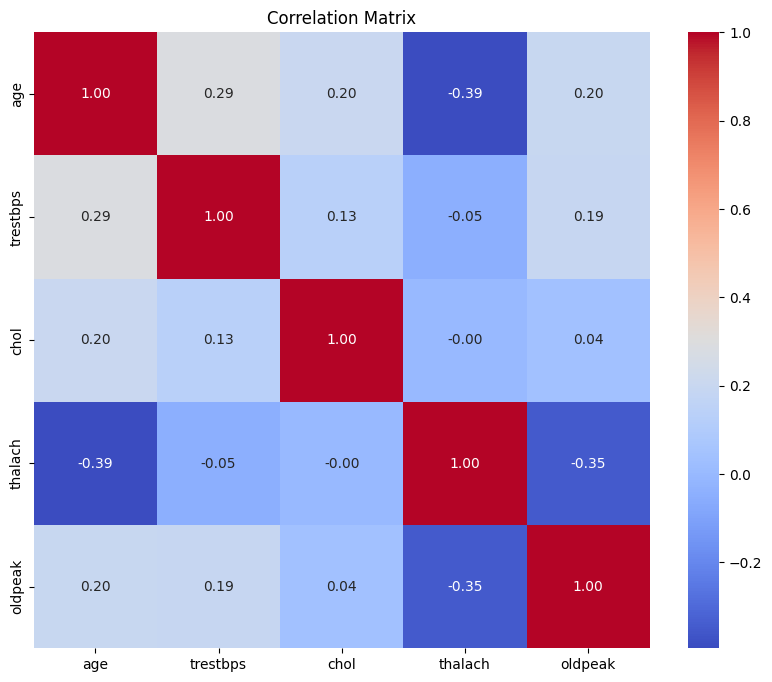

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

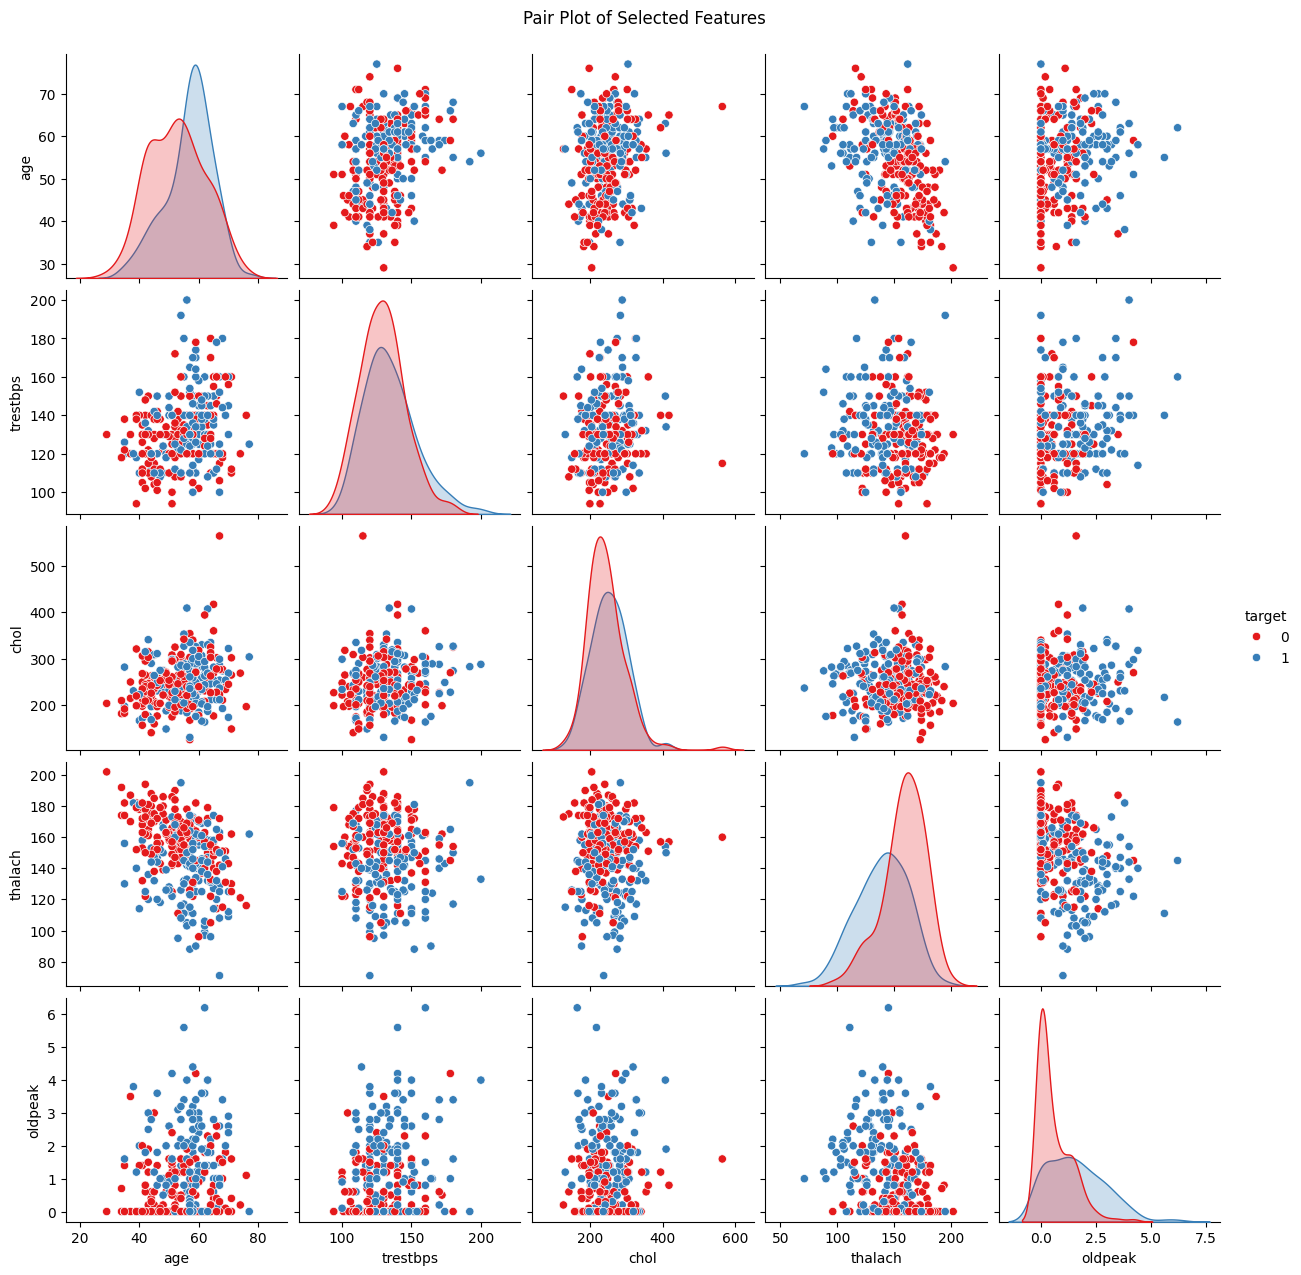

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset (example using rice dataset or heart-disease/processed.cleveland.data as per context)
# Ensure that you have already loaded your dataset into df_combined as shown in your previous example

# Define the selected features and target variable (adjust for your dataset)
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # Change this as needed
target_variable = 'num'  # Assuming 'num' is the target for the heart disease dataset

# Combine selected features and target into a single DataFrame
df_combined = df[selected_features].copy()
df_combined['target'] = (df[target_variable] > 0).astype(int)  # Binary classification (1 for heart disease, 0 for no disease)

# 1. Correlation Matrix
correlation_matrix = df_combined.drop(columns='target').corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

# 2. Pair Plots
sns.pairplot(df_combined, hue='target', palette='Set1', vars=selected_features)
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

**Comment**: The pair plot and correlation matrix show some significant relationships, such as between  `chol` (cholesterol level) and `thalach` (maximum heart rate achieved) and `oldpeak`.


## **Fit a Logistic Regression Model**


Accuracy: 0.8


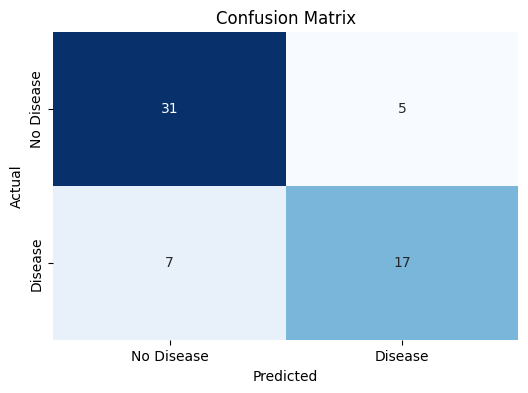


Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        36
           1       0.77      0.71      0.74        24

    accuracy                           0.80        60
   macro avg       0.79      0.78      0.79        60
weighted avg       0.80      0.80      0.80        60



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the feature set and the target variable
X = df[["age", "trestbps", "chol", "thalach", "oldpeak"]]  # Select features
y = (df['num'] > 0).astype(int)  # Binary classification: 1 for presence of heart disease, 0 for absence

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Precision, Recall, F1-Score
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report (Precision, Recall, F1-Score):")
print(classification_rep)

In [ ]:
from sklearn.metrics import accuracy_score
# Simple accuracy evaluation:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


**Comment**: The logistic regression model gives an accuracy of around **80%**, showing reasonable performance in predicting the presence of heart disease.

## **Using `statsmodels.Logit` to Obtain P-values**

In [ ]:
import statsmodels.api as sm

# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train)

# Fit the model using Logit
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Obtain p-values
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.543990
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                    num   No. Observations:                  237
Model:                          Logit   Df Residuals:                      231
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2140
Time:                        12:16:18   Log-Likelihood:                -128.93
converged:                       True   LL-Null:                       -164.02
Covariance Type:            nonrobust   LLR p-value:                 9.356e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9896      1.936      0.511      0.609      -2.804       4.784
age           -0.0042      0.

Extract and display the p-values in a simpler format


In [ ]:
p_values = logit_model.pvalues
print("\nP-values for each feature:\n", p_values)


P-values for each feature:
 const       0.609181
age         0.827700
trestbps    0.059135
chol        0.152213
thalach     0.000056
oldpeak     0.000041
dtype: float64


Here we can identify features with high p-values, which may be discarded as they might not contribute significantly to the model.

- **Significant**: `thalach` (p = 0.000056), `oldpeak` (p = 0.000041)
- **Borderline**: `trestbps` (p = 0.059135)
- **Not significant**: `age` (p = 0.827700), `chol` (p = 0.152213), `const` (p = 0.609181)



**Conclusion**: Among the features, `thalach` and `oldpeak` are the most significant predictors of heart disease, while `age`, `chol`, and `trestbps` have lesser significance.

# **Logistic regression First/Second-Order Methods**


## Generate Data Using Given Code


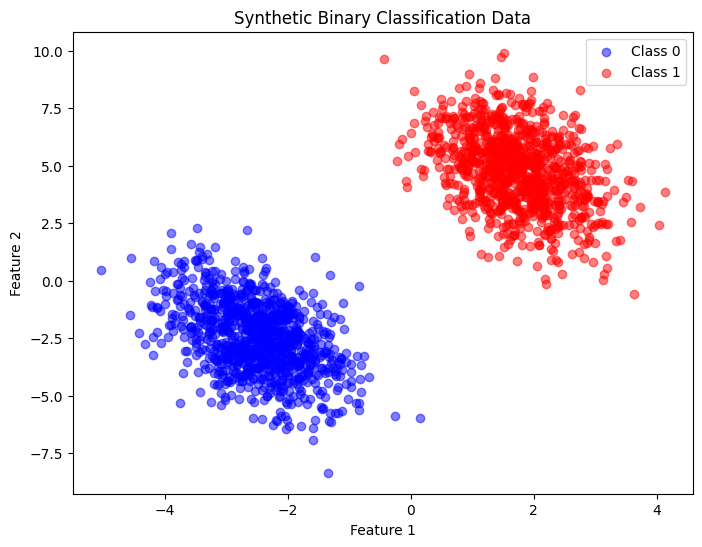

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Apply transformation
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1', alpha=0.5)
plt.title('Synthetic Binary Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Short discussion: This code generates a dataset with two centers as specified and applies a linear transformation. The `make_blobs` function is used to generate samples from two clusters, which are then transformed to the desired shape. The dataset will be used in the following tasks.

## Batch Gradient Descent Implementation

Below is the implementation of batch gradient descent, which updates the weights over 20 iterations. The weights are initialized randomly.

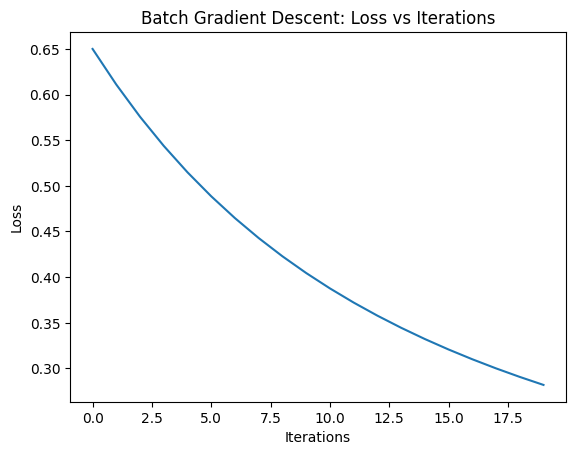

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize weights
def initialize_weights(dim):
    return np.zeros(dim)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def compute_loss(X, y, weights):
    predictions = sigmoid(np.dot(X, weights))
    return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

# Batch Gradient Descent with plotting
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    weights = initialize_weights(X.shape[1])
    loss_history = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / len(y)
        weights -= learning_rate * gradient
        loss = compute_loss(X, y, weights)
        loss_history.append(loss)

    # Plotting the loss vs iterations
    plt.figure()
    plt.plot(range(iterations), loss_history, label='Batch Gradient Descent')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Batch Gradient Descent: Loss vs Iterations')
    plt.show()

    return weights, loss_history

# Generate data and apply Batch Gradient Descent
weights_batch, loss_history_batch = batch_gradient_descent(X, y)


**Weight Initialization**:

Weights initialized to zero, avoiding bias introduction. This is because zero initialization ensures that the model starts with no preference for any particular feature. However, **random initialization** is often used in neural networks to avoid **symmetry-breaking**, where all neurons in the network would perform the same updates and remain identical if initialized to the same value. By initializing weights randomly, each weight update will be unique, enabling more effective learning during gradient descent.




## **Loss Function**:
Binary cross-entropy loss (also known as log loss) is used. It is the standard choice for logistic regression because it measures the performance of a classification model whose output is a probability value between 0 and 1. The loss function penalizes wrong predictions more heavily, encouraging the model to minimize the difference between the true label and the predicted probability:

$$
\text{Loss} = - \frac{1}{n} \sum_{i=1}^{n} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

This ensures that the loss approaches zero when the model's predictions are accurate (i.e., $\hat{y}_i \approx y_i$ ).

## **Plot**:
The loss vs iterations plot shows the model’s convergence over iterations. The plot typically displays a downward slope as the model iteratively minimizes the loss function. This visualization helps assess whether the optimization algorithm is properly converging and when it has reached a plateau, signaling that further iterations might not significantly reduce the loss.

## **Stochastic Gradient Descent (SGD)**:
SGD updates the weights based on a single example at a time, rather than the entire dataset like batch gradient descent. This leads to **faster updates** and often helps the model converge more quickly. However, the downside is that **SGD introduces noise** into the updates, which can cause **fluctuations in the loss function** during training. While it might converge faster in some cases, the noisy updates can cause the loss to jump around and prevent the model from settling into a global minimum, making the convergence less smooth than batch gradient descent.

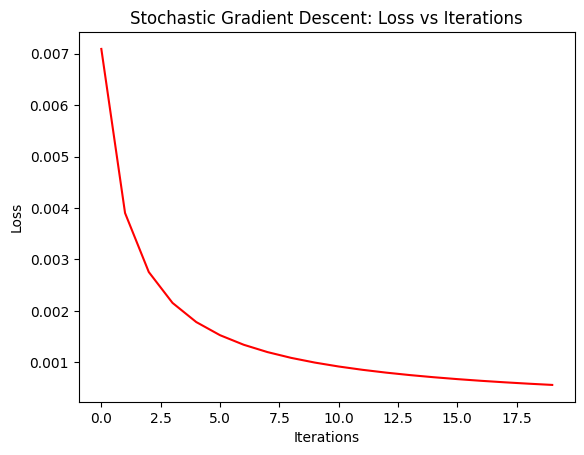

In [6]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=20):
    weights = initialize_weights(X.shape[1])
    loss_history = []

    for i in range(iterations):
        for j in range(len(y)):
            xi = X[j, :].reshape(1, -1)
            yi = y[j]
            prediction = sigmoid(np.dot(xi, weights))
            gradient = np.dot(xi.T, (prediction - yi))
            weights -= learning_rate * gradient
        loss = compute_loss(X, y, weights)
        loss_history.append(loss)

    # Plotting the loss vs iterations
    plt.figure()
    plt.plot(range(iterations), loss_history, label='Stochastic Gradient Descent', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Stochastic Gradient Descent: Loss vs Iterations')
    plt.show()

    return weights, loss_history

# Apply Stochastic Gradient Descent
weights_sgd, loss_history_sgd = stochastic_gradient_descent(X, y)


## **Newton’s Method**:
Newton’s method leverages second-order derivatives (i.e., the Hessian matrix), which allows it to use curvature information of the loss surface to make more informed updates. As a result, **Newton’s method often converges faster** than first-order methods like gradient descent, especially when near the optimum. However, this comes at a computational cost because calculating the Hessian and solving the linear system at each iteration is expensive for large datasets or high-dimensional data.

$$
w_{t+1} = w_t - H^{-1}(w_t) \nabla L(w_t)
$$

Where $H$ is the Hessian matrix, and $ \nabla L $ is the gradient of the loss. Newton’s method typically converges in fewer iterations but requires more computation per iteration.


## Plot and the code

<ipython-input-3-14e974e8610b>:15: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-14e974e8610b>:15: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


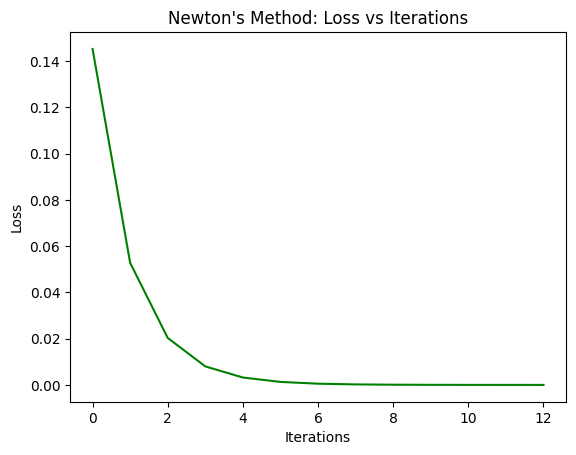

In [5]:
def newtons_method(X, y, iterations=20):
    weights = initialize_weights(X.shape[1])
    loss_history = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / len(y)
        hessian = np.dot(X.T, np.dot(np.diag(predictions * (1 - predictions)), X)) / len(y)
        weights -= np.linalg.inv(hessian).dot(gradient)
        loss = compute_loss(X, y, weights)
        loss_history.append(loss)

    # Plotting the loss vs iterations
    plt.figure()
    plt.plot(range(iterations), loss_history, label="Newton's Method", color='green')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title("Newton's Method: Loss vs Iterations")
    plt.show()

    return weights, loss_history

# Apply Newton's Method
weights_newton, loss_history_newton = newtons_method(X, y)


 ##

<ipython-input-3-14e974e8610b>:15: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-3-14e974e8610b>:15: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))


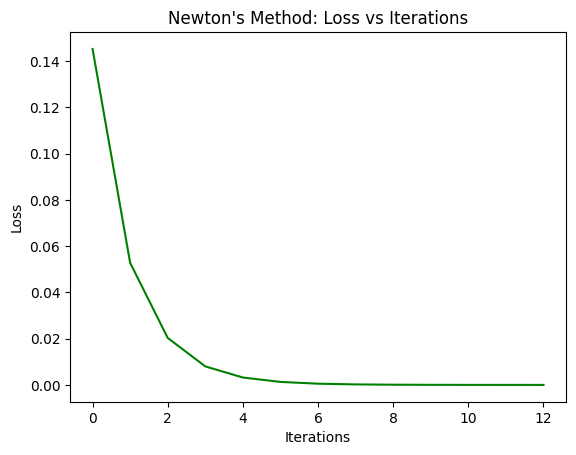

In [7]:
def newtons_method(X, y, iterations=20):
    weights = initialize_weights(X.shape[1])
    loss_history = []

    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / len(y)
        hessian = np.dot(X.T, np.dot(np.diag(predictions * (1 - predictions)), X)) / len(y)
        weights -= np.linalg.inv(hessian).dot(gradient)
        loss = compute_loss(X, y, weights)
        loss_history.append(loss)

    # Plotting the loss vs iterations
    plt.figure()
    plt.plot(range(iterations), loss_history, label="Newton's Method", color='green')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title("Newton's Method: Loss vs Iterations")
    plt.show()

    return weights, loss_history

# Apply Newton's Method
weights_newton, loss_history_newton = newtons_method(X, y)


## Loss Comparison with respect to number of iterations:

- **Batch Gradient Descent**: The loss decreases steadily over iterations. Since it uses the entire dataset for each update, the convergence is smooth but typically slower than stochastic methods. This method requires more iterations to converge compared to Newton’s method but tends to show steady and reliable improvement over time.

- **Stochastic Gradient Descent**: The loss fluctuates more compared to batch gradient descent because it updates the weights for each individual data point. While it sometimes converges faster due to more frequent updates, the fluctuations caused by noisy updates prevent it from having a smooth descent. **Noise** in the updates leads to less stable convergence, but it can escape shallow local minima faster than other methods.

- **Newton’s Method**: The loss decreases much faster than both gradient descent methods, showing rapid convergence within a few iterations. This is due to the use of second-order derivatives (Hessian matrix), which allows the method to make larger and more accurate updates in each iteration. However, Newton’s method is computationally expensive, especially for large datasets or high-dimensional problems, making it less practical for large-scale applications despite its rapid convergence.

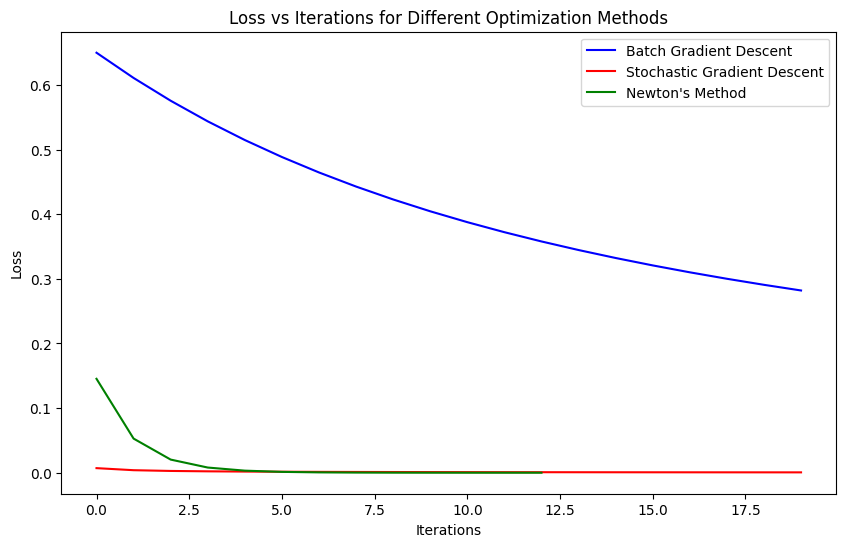

In [8]:
import matplotlib.pyplot as plt

# Plotting all methods' loss histories
plt.figure(figsize=(10, 6))
plt.plot(loss_history_batch, label='Batch Gradient Descent', color='blue')
plt.plot(loss_history_sgd, label='Stochastic Gradient Descent', color='red')
plt.plot(loss_history_newton, label="Newton's Method", color='green')
plt.title('Loss vs Iterations for Different Optimization Methods')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Summary**:
- **Batch Gradient Descent** is more stable and reliable for convergence but requires more iterations.
- **Stochastic Gradient Descent** converges faster due to frequent updates but introduces noise, making the descent less smooth.
- **Newton’s Method** converges the fastest, requiring fewer iterations but is computationally expensive due to the need for second-order derivatives.

The choice of method depends on the dataset size and the computational cost you're willing to handle. For small datasets, Newton’s method is often the fastest, but for larger datasets, gradient descent methods may be preferable specially when using more complex functions.

## **Choosing Number of Iterations**:
1. **Convergence Check**: One approach to determining when to stop is to monitor the change in loss between iterations. If the loss reduction is negligible (e.g., below a threshold like 0.001), the algorithm can be considered converged, and further iterations may not significantly improve the model.

2. **Cross-Validation**: Another approach is to use **cross-validation** to select the optimal number of iterations. You can divide the dataset into training and validation sets and evaluate the loss on the validation set after each iteration. Stop when the validation loss starts increasing, which may indicate **overfitting**.

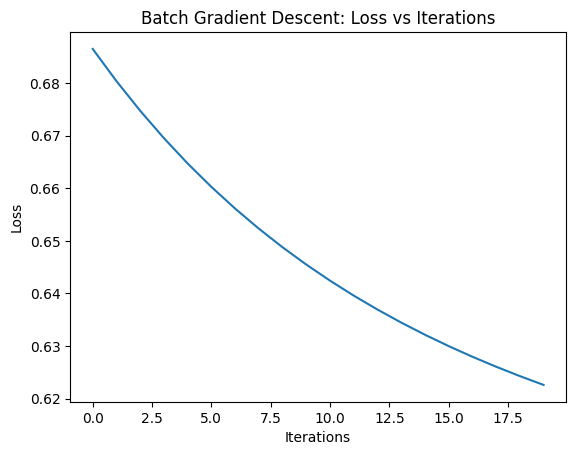

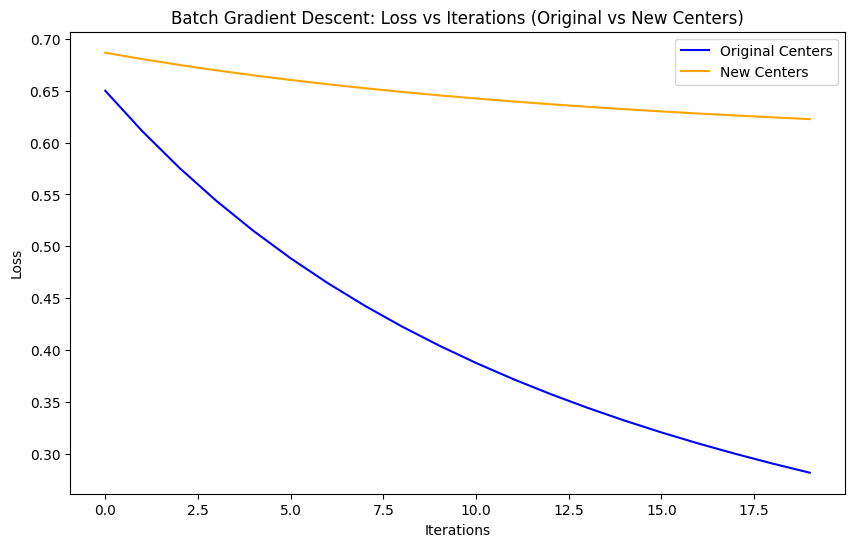

In [9]:
# Change dataset centers
centers = [[3, 0], [5, 1.5]]
X_new, y_new = make_blobs(n_samples=2000, centers=centers, random_state=5)
X_new = np.dot(X_new, transformation)

# Apply Batch Gradient Descent for new dataset
weights_new_centers, loss_history_new_centers = batch_gradient_descent(X_new, y_new)

# Plot the new loss vs old loss for Batch Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(loss_history_batch, label='Original Centers', color='blue')
plt.plot(loss_history_new_centers, label='New Centers', color='orange')
plt.title('Batch Gradient Descent: Loss vs Iterations (Original vs New Centers)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


## **Changed Centers Analysis**:
Changing the centers of the dataset (e.g., moving from `[-5, 0]` and `[5, 1.5]` to `[3, 0]` and `[5, 1.5]`) alters the **separability** of the two classes. When the centers are closer together, the data becomes less separable, leading to slower convergence because the model has a harder time distinguishing between classes. If the classes are **more distinct**, the model can converge faster since the decision boundary is clearer.

In summary, the degree of class separation directly influences the **convergence behavior**. A more separable dataset generally leads to quicker convergence because it is easier for the model to find a linear boundary between classes.